In [2]:
import numpy as np
def basisLS(Z, y):
    assert len(Z.shape) == 2 # z = d x n
    assert Z.shape[1] == y.shape[0] # y = n x 1
    # W = np.linalg.inv(Z@Z.T) @ Z @ y
    W = np.linalg.solve(Z@Z.T, Z@y) # W = d x 1
    R = np.mean((Z.T@W-y)**2) # W = d x 1
    return W, R

In [27]:
def kfold_cv(x, y, p, K):
    # p = polynomial order
    # K = number of folds
    
    # basis expansion
    Z = np.array([x**order for order in range(p)])
    # print(Z)
    # print(Z.shape)
    # print(Z.shape)
    # print(y.shape)
    N = y.shape[0]
    test_Rs = []
    train_Rs = []
    
    for fold in range(K):
        start = int(fold / K * N)
        end   = int((fold + 1) / K * N)

        # boolean mask
        mask = np.ones(N, dtype=bool)
        mask[start:end] = False   # test indices set to False

        # split
        train_x, train_y = Z[:, mask], y[mask, :]
        test_x,  test_y  = Z[:, ~mask], y[~mask, :]

        # fit on train
        W, _ = basisLS(train_x, train_y)
        # print(train_y)
        # print("Here", train_y.shape, test_y.shape)
        # print(W)

        # compute residuals

        train_R = np.sum((train_x.T @ W - train_y) ** 2)
        test_R  = np.sum((test_x.T @ W - test_y) ** 2)
    

        # print(test_R)
        test_Rs.append(test_R)
        train_Rs.append(train_R)
        
    return np.sum(train_Rs)/len(train_Rs), np.sum(test_Rs)/len(test_Rs)
    
    
    

In [28]:
x = np.array([0.23, 0.88, 0.21, 0.92, 0.49, 0.62, 0.77, 0.52, 0.30, 0.19])
y = np.array([0.19, 0.96, 0.33, 0.80, 0.46, 0.45, 0.67, 0.32, 0.38, 0.37]).reshape(-1, 1)

In [29]:
print(x.shape, y.shape)

(10,) (10, 1)


In [31]:
test_cvs = []
train_cvs = []
order_range = 12
for order in range(1, order_range):
    train_cv, test_cv = kfold_cv(x, y, order, 5)
    train_cvs.append(train_cv)
    test_cvs.append(test_cv)


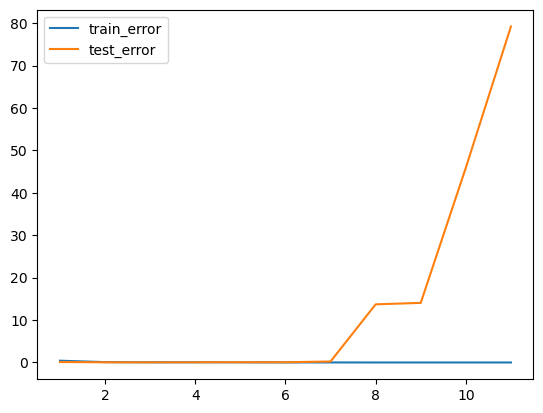

In [32]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, order_range)], train_cvs, label="train_error")
plt.plot([i for i in range(1, order_range)], test_cvs, label="test_error")
plt.legend()
plt.show()

In [33]:
print(test_cvs)
print(train_cvs)

[0.11069999999999999, 0.042654269219386705, 0.03235838133747224, 0.04190438655821714, 0.05230507479746342, 0.04992121947084164, 0.23760361342141528, 13.7051740211599, 14.048950949585194, 45.909624374057955, 79.20787529357719]
[0.41552, 0.08220586644962599, 0.04351592134535905, 0.04113456600929809, 0.03637992119117834, 0.013898811259981231, 0.007744375048970971, 2.006049626800829e-09, 5.061148438487748e-09, 4.1349107914101824e-11, 2.3613989721786082e-11]


test [0.11069999999999999, 0.04265426921938677, 0.03235838133747147, 0.04190438655822863, 0.05230507480154425, 0.04992121995410366, 0.23760393923761383, 13.693284367093383, 22.787575346436473, 37.26794695013196, 59.37211439243009]
train [0.41552000000000006, 0.08220586644962599, 0.04351592134535903, 0.04113456600929807, 0.03637992119117841, 0.013898811259983542, 0.0077443750489634405, 2.3148905923483955e-21, 2.878405017813515e-22, 1.2081351046222973e-22, 2.821846901992135e-23]


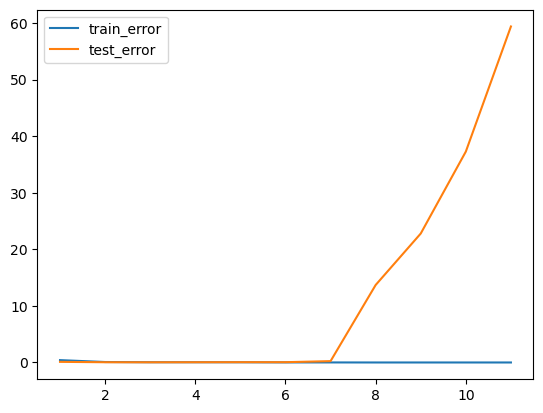

In [25]:
import sklearn
# use already built in function to do poynomial fit and cross validation
def poly_expand(x, p):
    return np.array([x**order for order in range(p)])
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def kfold_cv_sklearn(x, y, p, K):
    Z = poly_expand(x, p).T # Z = n x d
    kf = KFold(n_splits=K, shuffle=False)
    test_Rs = []
    train_Rs = []
    for train_index, test_index in kf.split(Z):
        train_x, train_y = Z[train_index, :], y[train_index, :]
        test_x,  test_y  = Z[test_index, :], y[test_index, :]

        model = LinearRegression().fit(train_x, train_y)
        train_y_pred = model.predict(train_x)
        test_y_pred  = model.predict(test_x)

        train_R = mean_squared_error(train_y, train_y_pred) * train_y.shape[0]
        test_R  = mean_squared_error(test_y, test_y_pred) * test_y.shape[0]
        test_Rs.append(test_R)
        train_Rs.append(train_R)
        
    return np.sum(train_Rs)/len(train_Rs), np.sum(test_Rs)/len(test_Rs)

train_cvs = []
test_cvs = []
order_range = 12
for order in range(1, order_range):
    train_cv, test_cv = kfold_cv_sklearn(x, y, order, 5)
    train_cvs.append(train_cv)
    test_cvs.append(test_cv)

import matplotlib.pyplot as plt
plt.plot([i for i in range(1, order_range)], train_cvs, label="train_error")
plt.plot([i for i in range(1, order_range)], test_cvs, label="test_error")
print("test", test_cvs)
print("train", train_cvs)
plt.legend()
plt.show()
#!/usr/bin/env python3